In [1]:
'''Stock Price Analysis and Daily Return Visualization'''
# Import libraries
!pip install yfinance
!pip install matplotlib 
!pip install seaborn
#! runs a terminal command and downloads yfinance package
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [7]:
def analyse_stock(ticker, start="2022-01-01", end="2025-01-01"):
    data = yf.download(ticker, start=start, end=end)

    if data.empty:
        print (f"No data found for {ticker}")
        return
    data.columns = [' '.join(col).strip() for col in data.columns.values]
    data.head()

    #Drop rows with missing Close prices
    data = data.dropna(subset=[f'Close {ticker}'])
    #Calculate Daily Returns
    data['Daily Return'] = data[f'Close {ticker}'].pct_change()
    #Drop the first NaN in Daily Return
    data = data.dropna(subset=['Daily Return'])

    #Plot closing price
    plt.figure(figsize=(12,6))
    plt.plot(data[f'Close {ticker}'], label=f"{ticker} Close Price")
    plt.title(f"{ticker} Stock Price (2022-2025)")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()


    #Overall price trend
    start_price = data[f'Close {ticker}'].iloc[0]
    end_price = data[f'Close {ticker}'].iloc[-1]
    trend_pct = ((end_price - start_price)/start_price)*100

    if trend_pct > 0:
        print(f" {ticker} rose by {trend_pct:.2f}% between {data.index[0].date()} and {data.index[-1].date()}.")
    elif trend_pct < 0:
        print(f" {ticker}  by {trend_pct:.2f}% between {data.index[0].date()} and {data.index[-1].date()}.")
    else:
        print(f" {ticker} has no net change between {data.index[0].date()} and {data.index[-1].date()}.")


    #Plot Daily Return Distribution
    plt.figure(figsize=(12,6))
    sns.histplot(data['Daily Return'], bins=50, kde=True)
    plt.title(f"{ticker} Daily Returns Distribution")
    plt.show()

    #absolute extremes 
    #largest single day drop
    min_returns = data['Daily Return'].min()
    #largest single day gain
    max_returns = data['Daily Return'].max()

    # 1-99% quartile (robust range)
    low, high = data['Daily Return'].quantile([0.01,0.99])


    #Average daily return and volatility
    avg_daily_return = data['Daily Return'].mean()
    daily_volatility = data['Daily Return'].std()
   
    # Annualized return (assuming 252 trading days/year)
    annualised_return = ((1 + avg_daily_return/100) ** 252 -1)*100

    # Annualized volatility
    annualised_volatility = daily_volatility * np.sqrt(252)


    #automatic labels for wording
    trend_direction = "upwards" if trend_pct > 0 else "downward"
    min_label = "drop" if min_returns < 0 else "gain"
    max_label = "gain" if max_returns > 0 else "drop"
    avg_direction = "increase" if avg_daily_return > 0 else "decrease"
    #volatility < 30 is moderate and often acceptable amount of risk
    volatility_level = "moderate" if annualised_volatility < 30 else "high"

    #summary of stock growth vs risk
    if trend_pct > 0 and annualised_volatility < 30:
        profile = "solid growth potential with moderate fluctuations"
    elif trend_pct > 0:
        profile = "growth potential with noticeable short-term fluctuations"
    else:
        profile = "risk of decline with volatile behavior"


    insights = [
    f"**Price Growth:** {ticker} rose by **{trend_pct:.4f}%** between {data.index[0].date()} and {data.index[-1].date()} showing a {trend_direction} trend over the period.",
    f"**Daily Returns:** Ranged from **{min_returns:.4f}%** (largest single-day {min_label}) to **{max_returns:.4f}%** (largest single-day {max_label}).",
    f"**Typical Daily Returns (1st–99th pct):** {low:.4f}% to {high:.4f}%",
    f"**Average Daily Return:** **{avg_daily_return:.4f}%**, translating to an **annualised return** of approximately **{annualised_return:.4f}%**, showing an overall {avg_direction}.",
    f"**Volatility:** Daily volatility averaged **{daily_volatility:.4f}%**, which annualises to **{annualised_volatility:.4f}%**, indicating {volatility_level} risk.",
    f"**Risk-Return Profile:** The stock demonstrates {profile}, making it suitable for investors accordingly."
    ]


    from IPython.display import display, Markdown
    
    # Combine all insights into a single markdown string
    markdown_text = f"# Key Insights for {ticker}\n\n"  # Heading
    for line in insights:
        markdown_text += f"- {line}\n"  # Bullet points
    
    # Display as markdown in JupyterLab
    display(Markdown(markdown_text))

    return 

C:\Users\adaan\AppData\Local\Temp\ipykernel_11684\91768001.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


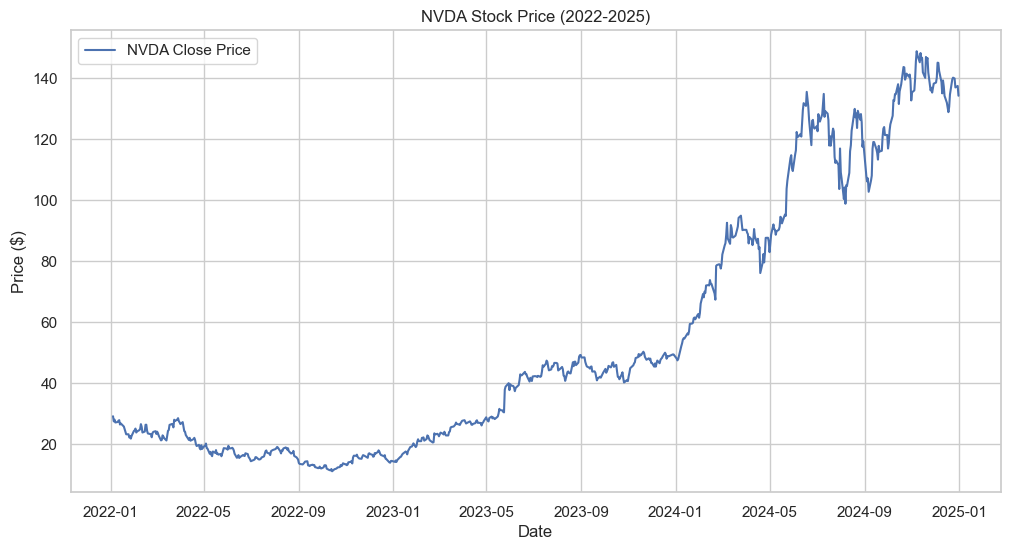

 NVDA rose by 359.25% between 2022-01-04 and 2024-12-31.


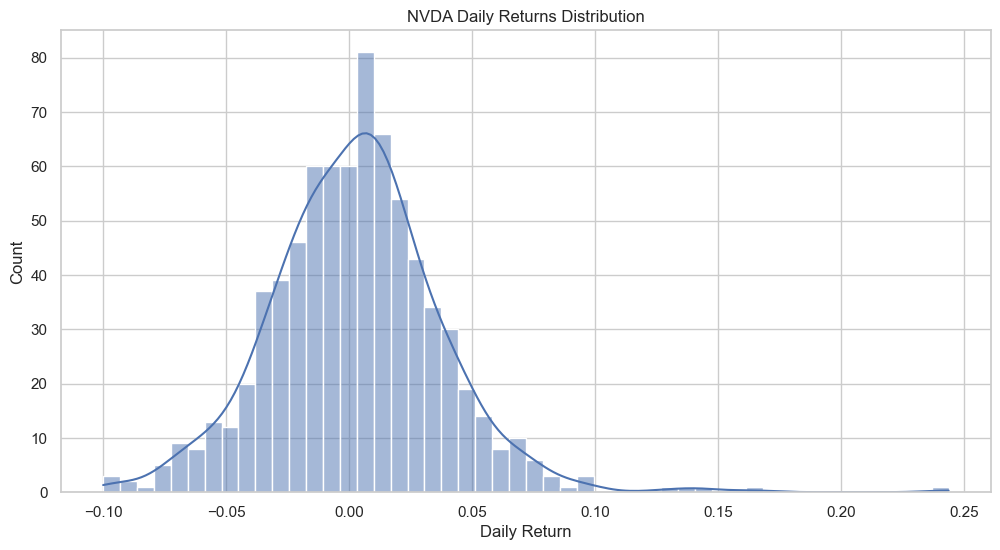

# Key Insights for NVDA

- **Price Growth:** NVDA rose by **359.25%** between 2022-01-04 and 2024-12-31 showing a upwards trend over the period.
- **Daily Returns:** Ranged from **-0.10%** (largest single-day drop) to **0.24%** (largest single-day gain).
- **Typical Daily Returns (1st–99th pct):** -0.08% to 0.09%
- **Average Daily Return:** **0.0026%**, translating to an **annualised return** of approximately **0.65%**, showing an overall increase.
- **Volatility:** Daily volatility averaged **0.0348%**, which annualises to **0.55%**, indicating moderate risk.
- **Risk-Return Profile:** The stock demonstrates solid growth potential with moderate fluctuations, making it suitable for investors accordingly.


In [11]:
analyse_stock("NVDA")

C:\Users\adaan\AppData\Local\Temp\ipykernel_11684\91768001.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


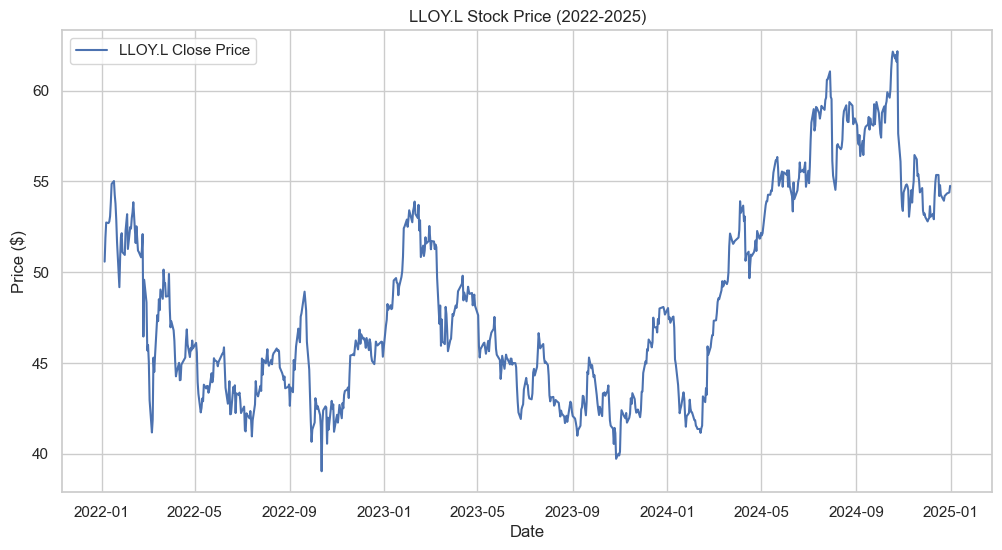

 LLOY.L rose by 8.26% between 2022-01-05 and 2024-12-31.


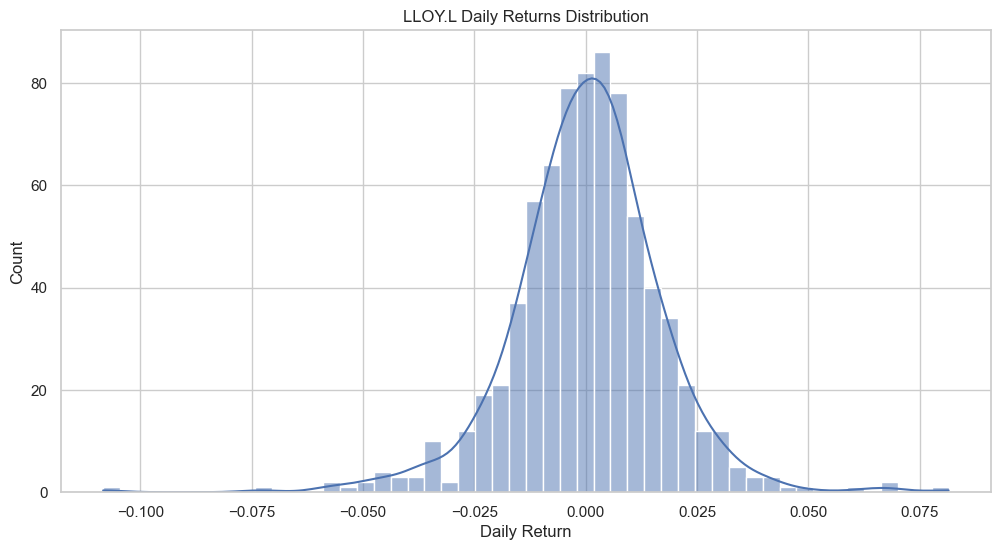

# Key Insights for LLOY.L

- **Price Growth:** LLOY.L rose by **8.26%** between 2022-01-05 and 2024-12-31 showing a upwards trend over the period.
- **Daily Returns:** Ranged from **-0.11%** (largest single-day drop) to **0.08%** (largest single-day gain).
- **Typical Daily Returns (1st–99th pct):** -0.05% to 0.04%
- **Average Daily Return:** **0.0003%**, translating to an **annualised return** of approximately **0.07%**, showing an overall increase.
- **Volatility:** Daily volatility averaged **0.0168%**, which annualises to **0.27%**, indicating moderate risk.
- **Risk-Return Profile:** The stock demonstrates solid growth potential with moderate fluctuations, making it suitable for investors accordingly.


In [12]:
analyse_stock("LLOY.L")